In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/sabah0312/ml-datasets/refs/heads/main/regression_toy_data'
df = pd.read_csv(url,  delim_whitespace=True)

df

/tmp/ipykernel_3564/1174090155.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url,  delim_whitespace=True)


,X,y
0,-0.5868,-0.0629
1,2.3774,5.5750
2,-1.2226,-1.2777
3,1.7578,4.6421
4,-0.8263,-0.6274
5,0.0053,1.2752
6,-1.0513,-1.1674
7,-1.4091,-1.6157
8,0.8233,2.6576
9,0.6964,2.3758


In [2]:
import torch

X = torch.tensor(df['X'].values, dtype= torch.float32)
y = torch.tensor(df['y'].values, dtype= torch.float32)

In [3]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [4]:
X.shape

torch.Size([10, 1])

## Plot the datset
*Ignore the code*

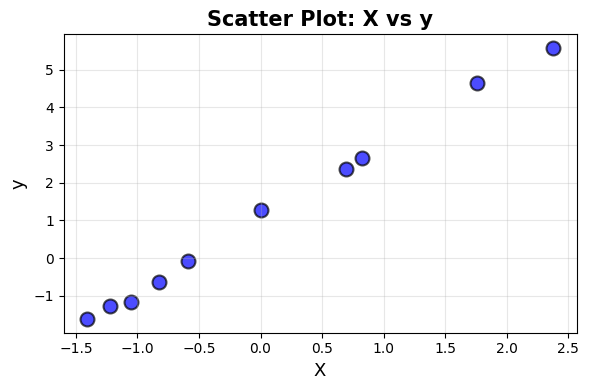

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['X'], df['y'], color='blue', s=100, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.xlabel('X', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Scatter Plot: X vs y', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Coverting the linear classifier into Linear Regression

In [6]:
class Perceptron:
  def __init__(self, num_features):
    self.w = torch.randn(num_features, 1)
    self.bias = torch.randn(1)

  def forward(self, x):
    return  x @ self.w + self.bias

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction

    self.bias += error
    self.w += error * x
    return error

In [7]:
PPn = Perceptron(num_features=1)
print(f"{PPn.w}")
print(f"{PPn.bias}")

tensor([[0.0658]])
tensor([-0.3580])


In [8]:
predictions = PPn.forward(X)

In [9]:
X

tensor([[-0.5868],
        [ 2.3774],
        [-1.2226],
        [ 1.7578],
        [-0.8263],
        [ 0.0053],
        [-1.0513],
        [-1.4091],
        [ 0.8233],
        [ 0.6964]])

In [10]:
PPn = Perceptron(1)
print(f"initial weights: {PPn.w}")
print(f"initial bias : {PPn.bias}")
epoch_no = 5
for epoch in range(epoch_no):
  total_error = 0
  for i in range(len(X)):
    error = PPn.update(X[i], y[i])
    total_error += abs(error)
  print(f"total_error: {total_error}")
  #print(f" weights: {PPn.w}")
  #print(f" bias : {PPn.bias}")

initial weights: tensor([[-0.3940]])
initial bias : tensor([1.5341])
total_error: tensor([70.9984])
total_error: tensor([143.7731])
total_error: tensor([253.3583])
total_error: tensor([449.6517])
total_error: tensor([801.2638])


Gradient Descent


In [11]:
class Perceptron:
  def __init__(self, num_features, learning_rate = 0.01):
    self.w = torch.randn(num_features, 1)
    self.bias = torch.randn(1)
    self.learning_rate = learning_rate

  def forward(self, x):
    return  x @ self.w + self.bias

  def update(self, x, y_true):
    prediction = self.forward(x)
    error = y_true - prediction

    self.bias += self.learning_rate * error
    self.w += self.learning_rate * error * x
    return error

In [12]:
PPn = Perceptron(1)
print(f"initial weights: {PPn.w}")
print(f"initial bias : {PPn.bias}")
epoch_no = 100
for epoch in range(epoch_no):
  error_count = 0
  for i in range(len(X)):
    error = PPn.update(X[i], y[i])
    error_count += abs(error)
  if epoch%10 == 0:
    print(f"epoch: {epoch}/ {epoch_no}, error_count: {error_count}")
print(f" weights: {PPn.w}")
print(f" bias : {PPn.bias}")

initial weights: tensor([[0.7938]])
initial bias : tensor([0.5629])
epoch: 0/ 100, error_count: tensor([11.8333])
epoch: 10/ 100, error_count: tensor([2.6499])
epoch: 20/ 100, error_count: tensor([1.0285])
epoch: 30/ 100, error_count: tensor([0.9289])
epoch: 40/ 100, error_count: tensor([0.9408])
epoch: 50/ 100, error_count: tensor([0.9445])
epoch: 60/ 100, error_count: tensor([0.9450])
epoch: 70/ 100, error_count: tensor([0.9450])
epoch: 80/ 100, error_count: tensor([0.9450])
epoch: 90/ 100, error_count: tensor([0.9449])
 weights: tensor([[1.9525]])
 bias : tensor([1.0674])


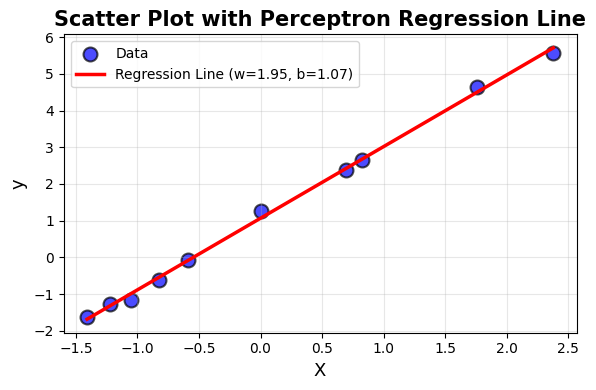

In [13]:
# Plot
plt.figure(figsize=(6, 4))

# Scatter plot
plt.scatter(df['X'], df['y'], color='blue', s=100, alpha=0.7,
            edgecolors='black', linewidth=1.5, label='Data')

# Generate regression line
x_line = torch.linspace(df['X'].min(), df['X'].max(), 100).reshape(-1, 1)
with torch.no_grad():
    y_line = PPn.forward(x_line)

# Plot regression line
plt.plot(x_line.numpy(), y_line.numpy(), color='red', linewidth=2.5,
         label=f'Regression Line (w={PPn.w.item():.2f}, b={PPn.bias.item():.2f})')

plt.xlabel('X', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Scatter Plot with Perceptron Regression Line', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Let's get introduced to Gradient Descent